In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score



In [5]:
A=np.array([1,2])
B=np.array([3,4])
A-B

array([-2, -2])

In [7]:
def euclidean_distance(p1,p2):

    return np.sqrt(np.sum((np.array(p1)-np.array(p2))**2))


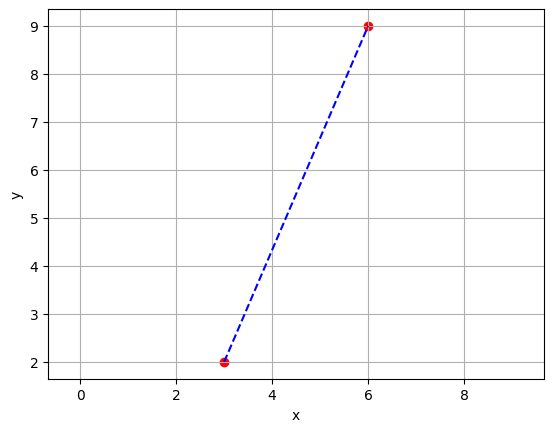

7.615773105863909


In [8]:
A=[3,2]
B=[6,9]

plt.scatter(A[0],A[1],color='r')
plt.scatter(B[0],B[1],color='r')
plt.plot([A[0], B[0]], [A[1], B[1]], 'b--')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

print(euclidean_distance(A,B))

In [9]:
A=[3,2,6]
B=[6,9,11]
print(euclidean_distance(A,B))


9.1104335791443


In [27]:
def manhattan_distance(p1, p2):
     return np.sum(np.abs(np.array(p1) - np.array(p2)))


In [42]:
print(manhattan_distance(A,B))

15


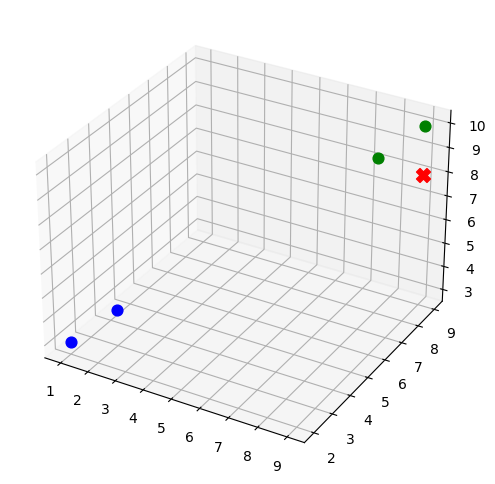

In [17]:
train_points = [(1, 2, 3), (2, 3, 4), (8, 8, 9), (9, 9, 10)]
train_labels = ["A", "A", "B", "B"]

test_point = (9, 9, 8)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = {"A": "blue", "B": "green"}
for p, label in zip(train_points, train_labels):
            ax.scatter(p[0], p[1], p[2], color=colors[label], s=60, label=label if label not in ax.get_legend_handles_labels()[1] else "")
ax.scatter(test_point[0], test_point[1], test_point[2], color="red", s=100, marker="X", label="Test Point")


In [12]:
A=[10,20,30]
B=["ivan","olga","natasha"]

for i,y in zip(A,B):
    print(i,y)

10 ivan
20 olga
30 natasha


In [18]:
distances = []
for p, label in zip(train_points, train_labels):
    dist = euclidean_distance(p, test_point)
    distances.append((dist, p, label))

print(distances)


[(11.74734012447073, (1, 2, 3), 'A'), (10.04987562112089, (2, 3, 4), 'A'), (1.7320508075688772, (8, 8, 9), 'B'), (2.0, (9, 9, 10), 'B')]


In [19]:
# сортируем
distances.sort(key=lambda x: x[0])
print(distances)



[(1.7320508075688772, (8, 8, 9), 'B'), (2.0, (9, 9, 10), 'B'), (10.04987562112089, (2, 3, 4), 'A'), (11.74734012447073, (1, 2, 3), 'A')]


In [20]:
# берём k ближайших
k=2
k_neighbors = distances[:k]
k_labels = [label for _, _, label in k_neighbors]
k_labels


['B', 'B']

In [21]:
# определяем класс по большинству
most_common = Counter(k_labels).most_common(1)[0][0]
print(most_common)

B


In [22]:
def Knn(train_points, train_labels, test_point, k=3):
    distances = []
    for p, label in zip(train_points, train_labels):
        dist = euclidean_distance(p, test_point)
        distances.append((dist, p, label))
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    k_labels = [label for _, _, label in k_neighbors]
    most_common = Counter(k_labels).most_common(1)[0][0]
    return most_common

    


'A'

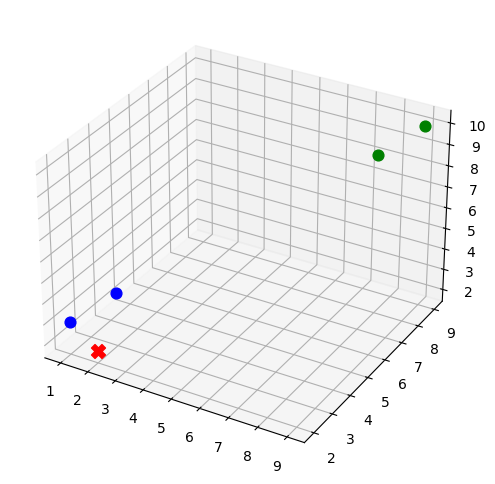

In [24]:
train_points = [(1, 2, 3), (2, 3, 4), (8, 8, 9), (9, 9, 10)]
train_labels = ["A", "A", "B", "B"]

test_point = (2, 2, 2)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = {"A": "blue", "B": "green"}
for p, label in zip(train_points, train_labels):
            ax.scatter(p[0], p[1], p[2], color=colors[label], s=60, label=label if label not in ax.get_legend_handles_labels()[1] else "")
ax.scatter(test_point[0], test_point[1], test_point[2], color="red", s=100, marker="X", label="Test Point")


Knn(train_points,train_labels,test_point,2)

In [28]:
def Knn(train_points, train_labels, test_point, k=3):
    distances = []
    for p, label in zip(train_points, train_labels):
        dist = manhattan_distance(p, test_point)
        distances.append((dist, p, label))
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    k_labels = [label for _, _, label in k_neighbors]
    most_common = Counter(k_labels).most_common(1)[0][0]
    return most_common

'B'

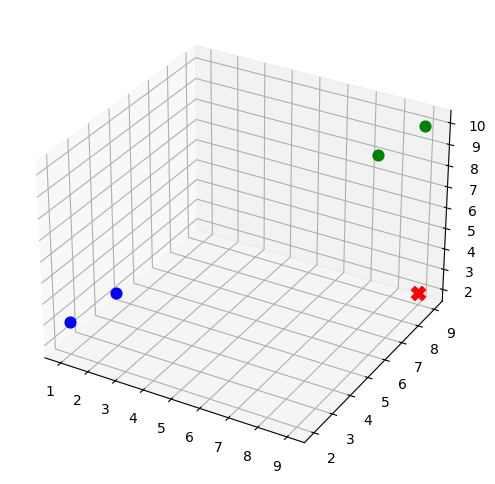

In [29]:
train_points = [(1, 2, 3), (2, 3, 4), (8, 8, 9), (9, 9, 10)]
train_labels = ["A", "A", "B", "B"]

test_point = (9, 9, 2)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = {"A": "blue", "B": "green"}
for p, label in zip(train_points, train_labels):
            ax.scatter(p[0], p[1], p[2], color=colors[label], s=60, label=label if label not in ax.get_legend_handles_labels()[1] else "")
ax.scatter(test_point[0], test_point[1], test_point[2], color="red", s=100, marker="X", label="Test Point")


Knn(train_points,train_labels,test_point,2)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

train_points = [(1, 2, 3), (2, 3, 4), (8, 8, 9), (9, 9, 10)]
train_labels = ["A", "A", "B", "B"]
test_point = [(2, 2, 2)]


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_points, train_labels)
predicted_label = knn.predict(test_point)

print(predicted_label)

['A']


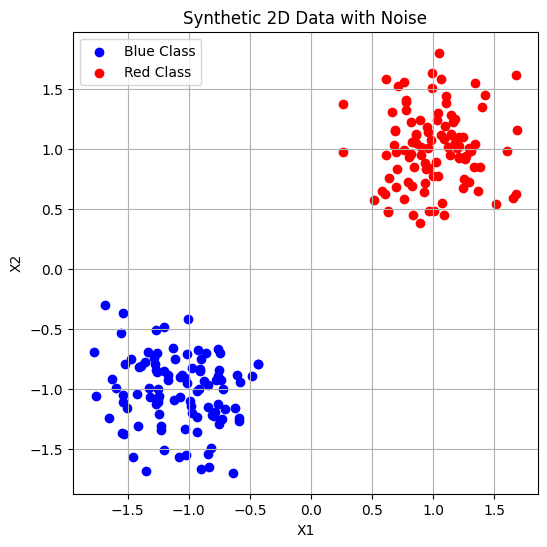

In [32]:
n_samples = 100
n_test = 50 

noise = 0.3
blue_points = np.random.randn(n_samples, 2) * noise + np.array([-1, -1])
red_points = np.random.randn(n_samples, 2) * noise + np.array([1, 1])
X = np.vstack([blue_points, red_points])
y = np.array([0]*n_samples + [1]*n_samples)

plt.figure(figsize=(6, 6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Blue Class')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Red Class')
plt.title("Synthetic 2D Data with Noise")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

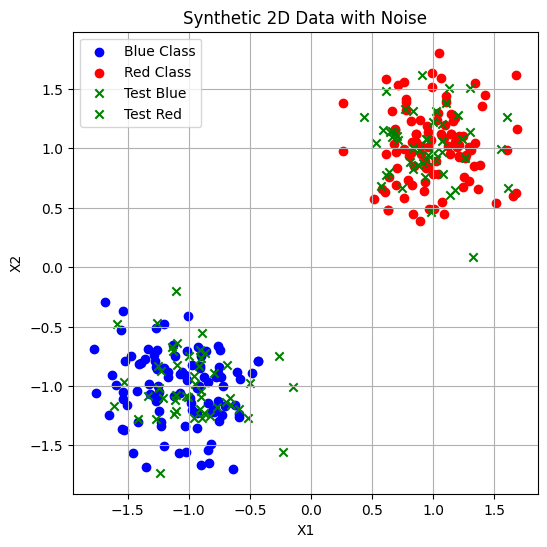

In [33]:
blue_test = np.random.randn(n_test, 2) * noise + np.array([-1, -1])
red_test  = np.random.randn(n_test, 2) * noise + np.array([1, 1])
X_test = np.vstack([blue_test, red_test])
y_test = np.array([0]*n_test + [1]*n_test)

plt.figure(figsize=(6, 6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Blue Class')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Red Class')
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color='green', marker='x', label='Test Blue')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color='green', marker='x', label='Test Red')

plt.title("Synthetic 2D Data with Noise")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


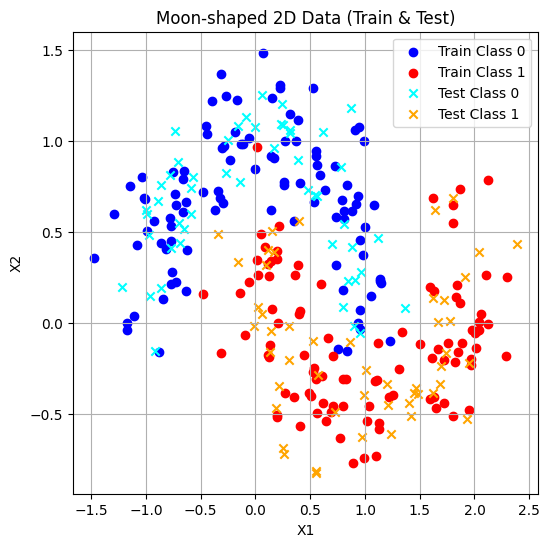

In [36]:
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=200, noise=0.2, random_state=42)
X_test, y_test = make_moons(n_samples=100, noise=0.2, random_state=24)
plt.figure(figsize=(6,6))
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color='blue', label='Train Class 0')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='red', label='Train Class 1')
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color='cyan', marker='x', label='Test Class 0')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color='orange', marker='x', label='Test Class 1')
plt.title("Moon-shaped 2D Data (Train & Test)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.96


In [39]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

c:\Users\Naeim\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


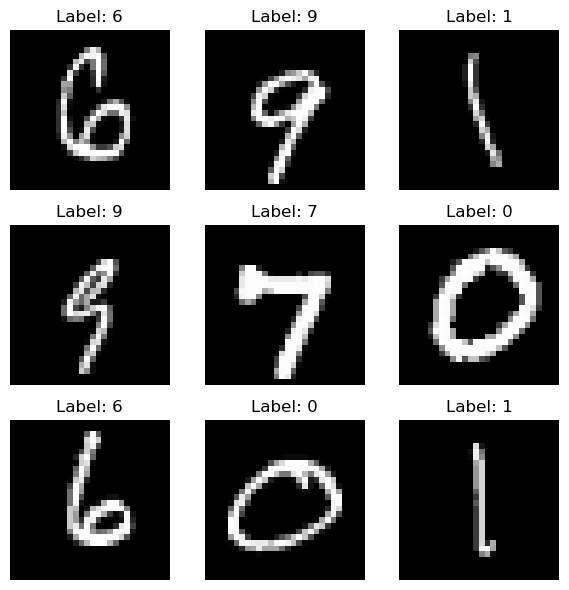

In [68]:
indices = np.random.choice(len(X), 9, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img = X[indices[i]].reshape(28, 28)  
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y[indices[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, test_size=2000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [72]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9475


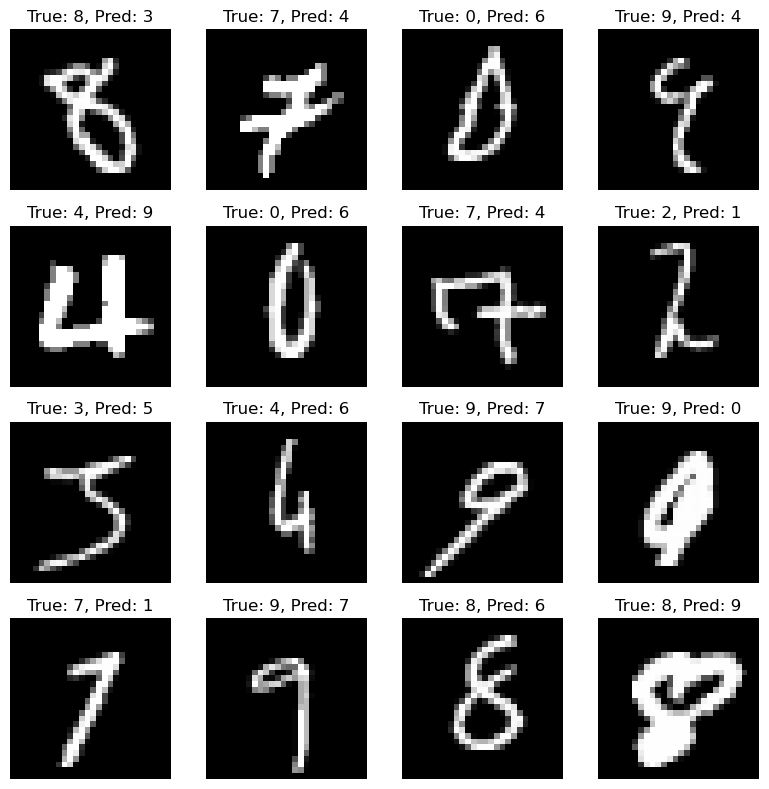

In [73]:
# Находим индексы ошибок
errors_idx = np.where(y_pred != y_test)[0]

# Берем первые 16 ошибок для визуализации
errors_to_plot = errors_idx[:16]

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    idx = errors_to_plot[i]
    img = X_test[idx].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [86]:
from sklearn.datasets import make_regression

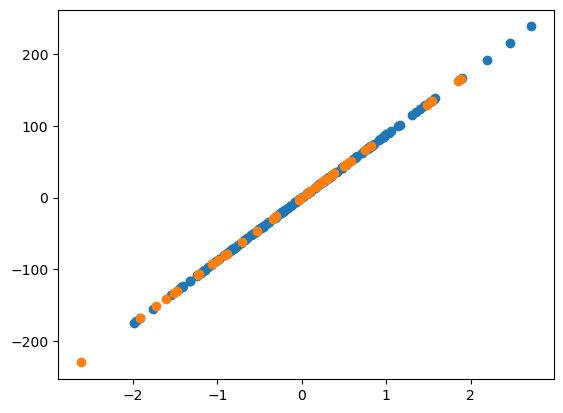

In [104]:
X, y = make_regression(n_samples=200, n_features=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.show()



In [105]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [106]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [112]:
y_pred = knn_regressor.predict(X_test)
print(r2_score(y_test, y_pred))

0.9841199442809472
